Instructions:
Load / Read data from csv file:

In [8]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

datafile = '''D:\Per Scholas\SparkStuff\data\Sales_October_2019.csv'''

# create the SparkSession
spark = SparkSession.builder.appName('DemoApp').getOrCreate()

df = spark.read.load(datafile, format="csv", header = True,inferSchema = True)


Lets inspect dataset by using below lines:

In [3]:
df.printSchema()
df.columns
df.dtypes
df.head()
df.show(truncate=False)

root
 |-- Order ID: integer (nullable = true)
 |-- Product: string (nullable = true)
 |-- Quantity Ordered: integer (nullable = true)
 |-- Price Each: double (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Purchase Address: string (nullable = true)

+--------+--------------------------+----------------+----------+--------------+-----------------------------------------+
|Order ID|Product                   |Quantity Ordered|Price Each|Order Date    |Purchase Address                         |
+--------+--------------------------+----------------+----------+--------------+-----------------------------------------+
|259358  |34in Ultrawide Monitor    |1               |379.99    |10/28/19 10:56|609 Cherry St, Dallas, TX 75001          |
|259359  |27in 4K Gaming Monitor    |1               |389.99    |10/28/19 17:26|225 5th St, Los Angeles, CA 90001        |
|259360  |AAA Batteries (4-pack)    |2               |2.99      |10/24/19 17:20|967 12th St, New York City, NY 10001  

Get the sum of price and quantity  column

In [4]:
df.groupBy('Product').sum('Price Each').show()

+--------------------+------------------+
|             Product|   sum(Price Each)|
+--------------------+------------------+
|    Wired Headphones| 25119.05000000091|
|  Macbook Pro Laptop|          892500.0|
|Apple Airpods Hea...|          249750.0|
|              iPhone|          500500.0|
|                null|              null|
|Lightning Chargin...| 36179.00000000046|
|Bose SoundSport H...|143985.60000000178|
|USB-C Charging Cable| 29193.85000000119|
|AAA Batteries (4-...| 6694.609999999667|
|        20in Monitor|46965.729999999945|
|    27in FHD Monitor|118642.09000000157|
|     Vareebadd Phone|           81200.0|
|34in Ultrawide Mo...|254973.28999999774|
|            LG Dryer|           30000.0|
|AA Batteries (4-p...| 8601.600000000228|
|        Google Phone|          358200.0|
|       Flatscreen TV|          157200.0|
|  LG Washing Machine|           36600.0|
|             Product|              null|
|27in 4K Gaming Mo...| 280402.8099999972|
+--------------------+------------

Example of Matplotlib and Pyspark
PySpark DataFrame can be converted to Python pandas DataFrame using a function toPandas().

array([[<Axes: title={'center': 'Order ID'}>,
        <Axes: title={'center': 'Quantity Ordered'}>],
       [<Axes: title={'center': 'Price Each'}>, <Axes: >]], dtype=object)

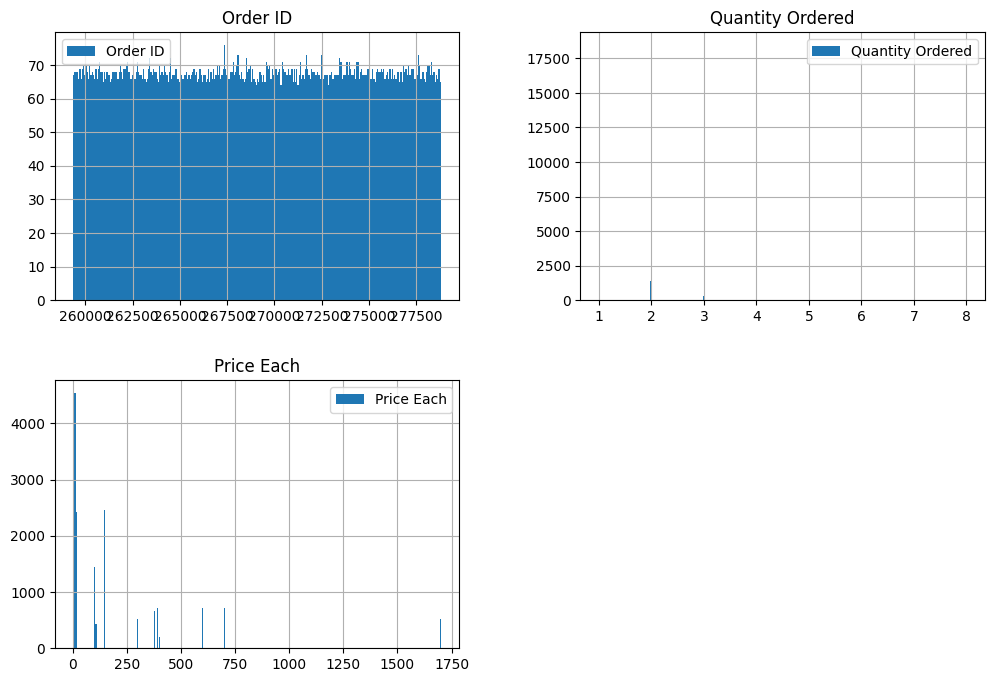

In [9]:
df_sample_pandas = df.toPandas()
df_sample_pandas.hist(bins=300, figsize=(12,8),  legend=True)

Example two - Using toPandas()

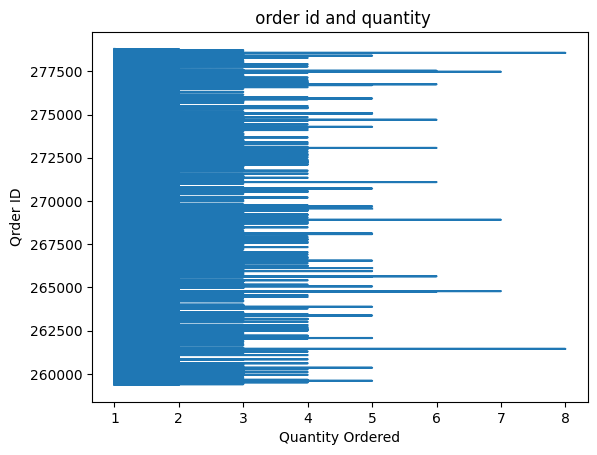

In [10]:
roc = df.toPandas()
plt.plot(roc['Quantity Ordered'], roc['Order ID'])

plt.ylabel('Qrder ID')
plt.xlabel('Quantity Ordered')
plt.title(' order id and quantity')
plt.show()

Write and save data into SQL
Classicmodels is the database name and salesdata is the table name, but you can change the database and table name.

The below lines will write/store all Dataframe (column) data into the database.

In [11]:
df.write.format("jdbc") \
  .mode("append") \
  .option("url", "jdbc:mysql://localhost:3306/classicmodels") \
  .option("dbtable", "classicmodels.salesdata") \
  .option("user", "root") \
  .option("password", "password") \
  .save()

We can write/store specific Dataframe (column) in the database by using the select() method, as shown below:

In [ ]:
df.select("Order ID","Product").write.format("jdbc") \
  .mode("append") \
  .option("url", "jdbc:mysql://localhost:3306/classicmodels") \
  .option("dbtable", "classicmodels.salesdata") \
  .option("user", "root") \
  .option("password", "password") \
.option("header","false")\
  .save()